# Project: Investigate No-Show Appointments Data From Kaggle 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I chose the "No-show appointments" dataset from Kaggle. It contains information for 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It records data for patient id, appointment id, gender, age, appointment date, location of the hospital, whether or not the patient is enrolled in Brasilian welfare program, whether or not the patient is suffering for Hipertension, Diabetes, Alcoholism or, if the patient has a special contition, the number of Handicaps that he has,  whether or not the patient has received a SMS and their final decision encoded with 'Yes' if it was a "No-show" and with 'No' if the patient showed up for his appointment. 




In [24]:
## import all necessary packages and functions.
import numpy as np # use to customize xticks on a histogram 
import pandas as pd # use for data analysis workflow
import matplotlib.pyplot as plt # use to plot data on a histogram
import seaborn as sns
import math
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In the next steps I read the csv file, displayed the first rows of it, I glanced at the data types in each column, and showed a descriptive statistics of each field. Thus, we noticed that date-type fields are not exactly in the best format for analysis, and the age field contains an aberrant value, -1, assuming the 0 value on the age column corresponds to the newborn. Otherwise, there are no other gaps in the data. In order to preserve the meaning of the data, I chose to replace this value with the average age.  

### General Properties

In [25]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
medical_appointments = pd.read_csv("noshowappointments.csv", parse_dates=["ScheduledDay","AppointmentDay"], index_col=0)
# I have changed the fields ScheduledDay and AppointmentDay into proper date types and I have indexed the table by PatientId
medical_appointments.head() # I have showed the first few lines of the DataFrame

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
medical_appointments.columns # I have displayed the name of the fields in the DataFrame

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [27]:
medical_appointments.dtypes # I have displayed the fields data types

AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [28]:
print(type(medical_appointments["AppointmentID"].iloc[0]))
print(type(medical_appointments["Gender"].iloc[0]))
print(type(medical_appointments["ScheduledDay"].iloc[0]))
print(type(medical_appointments["AppointmentDay"].iloc[0]))
print(type(medical_appointments["Age"].iloc[0]))
print(type(medical_appointments["Neighbourhood"].iloc[0]))
print(type(medical_appointments["Scholarship"].iloc[0]))
print(type(medical_appointments["Hipertension"].iloc[0]))
print(type(medical_appointments["Diabetes"].iloc[0]))
print(type(medical_appointments["Alcoholism"].iloc[0]))
print(type(medical_appointments["Handcap"].iloc[0]))
print(type(medical_appointments["SMS_received"].iloc[0]))
print(type(medical_appointments["No-show"].iloc[0]))
# I have displayed the data type of the first record in each field. 

<class 'numpy.int64'>
<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>


In [29]:
medical_appointments.isnull().any()
# I have checked if there are any null values in the DataFrame. 

AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [30]:
medical_appointments.describe(include="all")
# I have showed a descriptive statistics of the fields in the dataset. 

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,2016-05-06 07:09:54,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 20:07:23,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Data Cleaning

In [31]:
medical_appointments["Age"].replace(-1,int(medical_appointments["Age"].mean()),inplace=True)
# I have replaced the aberant value -1 in the Age column with the mean of the field. 

In [32]:
medical_appointments.describe(include="all")
# I have showed again a descriptive statistics of the fields in the dataset to check the correctness of the last step. 

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,2016-05-06 07:09:54,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 20:07:23,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675305e+06,NaN,NaN,NaN,37.089218,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,7.129575e+04,NaN,NaN,NaN,23.109921,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,5.030230e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [33]:
medical_appointments["Year"] = medical_appointments.AppointmentDay.dt.year
medical_appointments["Month"] = medical_appointments.AppointmentDay.dt.month
medical_appointments["Day"] = medical_appointments.AppointmentDay.dt.day
medical_appointments["Week"] = medical_appointments.AppointmentDay.dt.week
medical_appointments["Weekday"] = medical_appointments.AppointmentDay.dt.weekday
medical_appointments["Quarter"] = medical_appointments.AppointmentDay.dt.quarter
medical_appointments["Hour"] = medical_appointments.ScheduledDay.dt.hour
# I've crafted the date-type fields to extract the significant information (year, month, day, week, weekday, quarter, hour) 

medical_appointments.head()
# I have showed the first few lines of the DataFrame to check the correctness of the last step. 

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Year,Month,Day,Week,Weekday,Quarter,Hour
PatientId,,,,,,,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,29,17,4,2,18
5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,29,17,4,2,16
4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,29,17,4,2,16
8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,29,17,4,2,17
8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,29,17,4,2,16


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 How is data distributed by age, days, weeks, weekdays and hours?

In [34]:
#medical_appointments[medical_appointments['No-show'] == 0].groupby('Neighbourhood').count()
medical_appointments['No-show'].value_counts()
# I displayed the number of records that showed/ didn't show up for their appointments. 

No     88208
Yes    22319
Name: No-show, dtype: int64

In [35]:
medical_appointments['Agebins'] = medical_appointments['Age']//10
medical_appointments.head()
# I have created a column in which I will pur the intervals for age that I will plot latter 
# and I have displayed a few records to check the correctness of this step. 

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,...,SMS_received,No-show,Year,Month,Day,Week,Weekday,Quarter,Hour,Agebins
PatientId,,,,,,,,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,...,0,No,2016,4,29,17,4,2,18,6
5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,...,0,No,2016,4,29,17,4,2,16,5
4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,...,0,No,2016,4,29,17,4,2,16,6
8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,...,0,No,2016,4,29,17,4,2,17,0
8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,...,0,No,2016,4,29,17,4,2,16,5


Text(0.5,0,'Age in years')

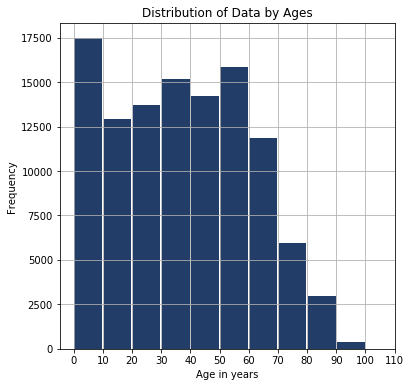

In [36]:
medical_appointments['Age'].plot.hist(figsize=(6,6),
                                      bins = [0,10,20,30,40,50,60,70,80,90,100],
                                      range = (medical_appointments['Age'].min(),110.), 
                                      align = 'mid', 
                                      rwidth = 0.95,
                                      grid = True,
                                      color = '#233d69')
plt.xticks(np.arange(0, 120, step=10))
plt.title('Distribution of Data by Ages')
plt.xlabel('Age in years')

Most medical appointments are made by people with age between 0 and 10, followed by the age group of 50 to 60 years. At the opposite side, the fewest appointments are made by people over 70.

Text(0.5,0,'Days')

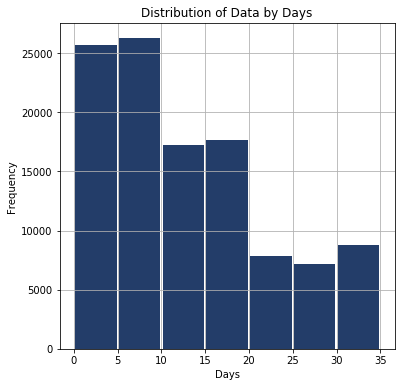

In [37]:
medical_appointments['Day'].plot.hist(figsize=(6,6),
                                      bins = [0,5,10,15,20,25,30,35] ,
                                      range = (medical_appointments['Day'].min(),35.),
                                      align = 'mid', 
                                      rwidth = 0.95,
                                      grid = True,
                                      color = '#233d69')
plt.xticks(np.arange(0, 40, step=5))
plt.title('Distribution of Data by Days')
plt.xlabel('Days')

Most appointments are made in the first ten days of the month. The fewest appointments are made in the last ten days of the month.

Text(0.5,0,'Weeks')

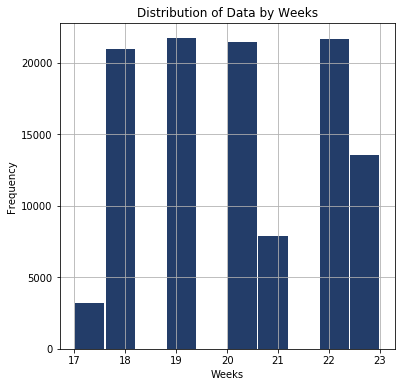

In [38]:
medical_appointments['Week'].plot.hist(figsize=(6,6),
                                      align = 'mid',
                                      range = (medical_appointments['Week'].min(),23.),
                                      rwidth = 0.95,
                                      grid = True,
                                      color = '#233d69')
plt.xticks(np.arange(17, 24, step=1))
plt.title('Distribution of Data by Weeks')
plt.xlabel('Weeks')

The weekly factor does not discriminate the data very much, they are approximately evenly distributed.

Text(0.5,0,'Weekdays')

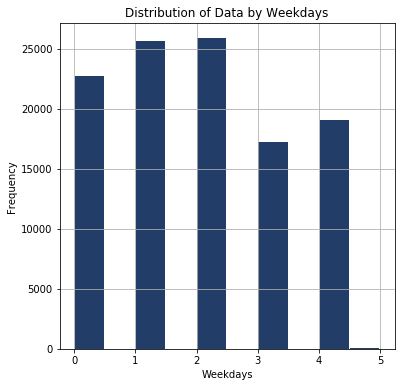

In [39]:
medical_appointments['Weekday'].plot.hist(figsize=(6,6),
                                      align = 'mid', 
                                      rwidth = 0.95,
                                      grid = True,
                                      color = '#233d69')
plt.title('Distribution of Data by Weekdays')
plt.xlabel('Weekdays')

Text(0.5,0,'Hours')

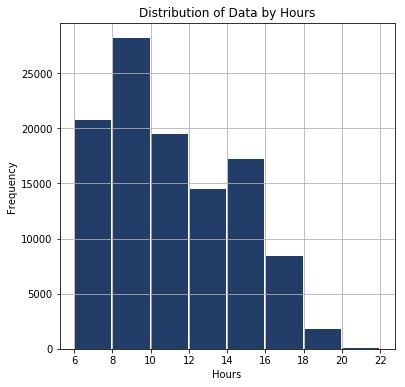

In [40]:
medical_appointments['Hour'].plot.hist(figsize=(6,6),
                                      bins = [6,8,10,12,14,16,18,20,22] ,
                                      range = (medical_appointments['Day'].min(),22.),
                                      align = 'mid', 
                                      rwidth = 0.95,
                                      grid = True,
                                      color = '#233d69')
plt.xticks(np.arange(6, 24, step=2))
plt.title('Distribution of Data by Hours')
plt.xlabel('Hours')

Most appointments are made on Tuesdays and Wednesdays, while the fewest appointments are made on Thursdays.

### Research Question 2  In what proportion people are showing up for their medical appointments judging by age, day of the week, day of the month, etc?

Text(0,0.5,'Proportion')

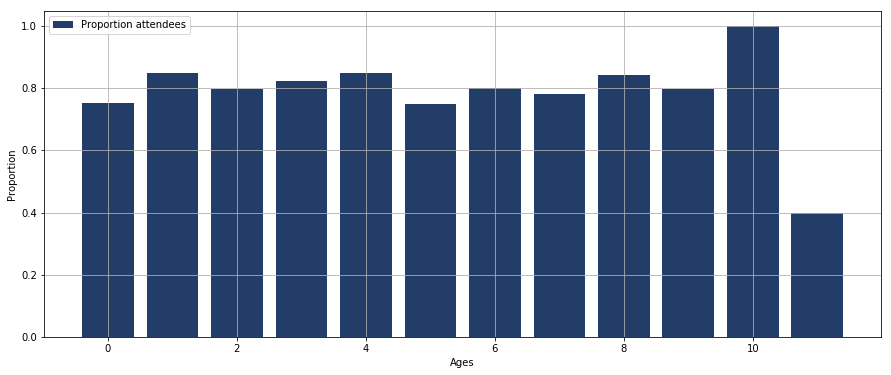

In [41]:
ma = medical_appointments[['Agebins','No-show','AppointmentID']]
ages = ma.Agebins.unique()
counts = ma.groupby(['Agebins','No-show']).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
plt.figure(figsize=(15,6))
plt.bar(ages, counts['No']/(counts['No']+counts['Yes']), color='#233d69', label= 'Proportion attendees')
plt.legend()
plt.grid(True)
plt.xlabel('Ages')
plt.ylabel('Proportion')

People aged between 10-19, 20-29, 30-39, 40-49, 60-69, 80-89, 90-99, 100-109 year honors their medical appointments in a proportion of at least 80%. At the opposite end, the age intervals in which people do not honor their appointments are 0-9, 50-59, 70-79 and over 110 years.

Text(0,0.5,'Proportion')

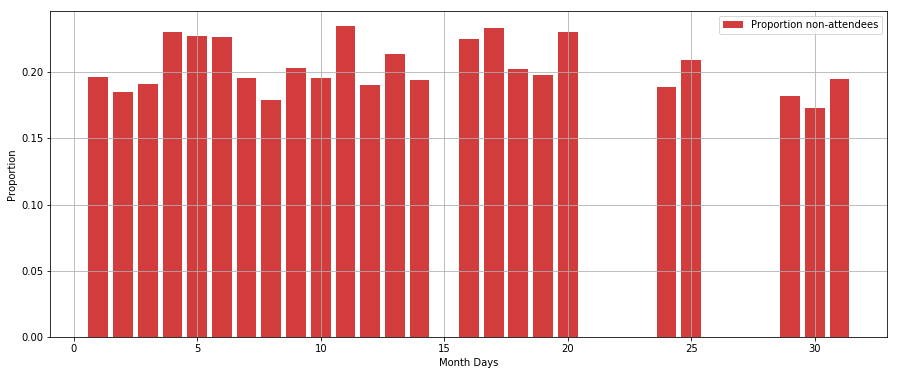

In [42]:
ma = medical_appointments[['Day','No-show','AppointmentID']]
days = ma.Day.unique()
counts = ma.groupby(['Day','No-show']).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
plt.figure(figsize=(15,6))
plt.bar(days,  counts['Yes']/(counts['No']+counts['Yes']), color='#d23c3c', label='Proportion non-attendees')
plt.legend()
plt.grid(True)
plt.xlabel('Month Days')
plt.ylabel('Proportion')

Assuming that days 15, 21, 22, 23, 26, 27, 28, 29 were days off or for which no data were recorded, days 4, 5, 6, 9, 11, 13, 16, 17, 20 and 25 of the month are the days with the highest percentages of non-attendees.

Text(0,0.5,'Proportion')

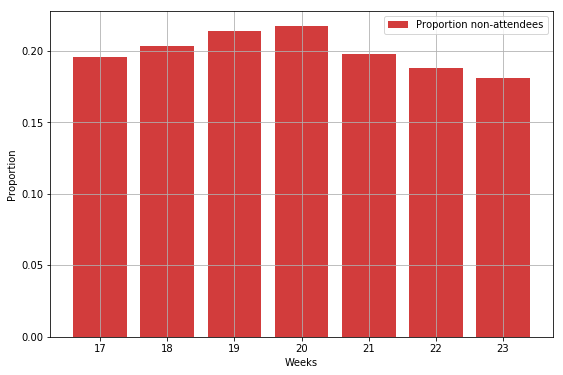

In [43]:
ma = medical_appointments[['Week','No-show','AppointmentID']]
weeks = ma.Week.unique()
counts = ma.groupby(['Week','No-show']).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
plt.figure(figsize=(9,6))
plt.bar(weeks, counts['Yes']/(counts['No']+counts['Yes']), color='#d23c3c', label='Proportion non-attendees')
plt.grid(True)
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Proportion')

During the 19th and 20th weeks there was the highest proportion of non-attendees.

Text(0,0.5,'Proportion')

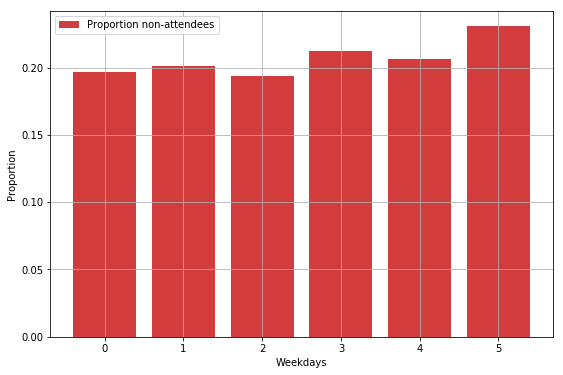

In [44]:
ma = medical_appointments[['Weekday','No-show','AppointmentID']]
weekdays = ma.Weekday.unique()
counts = ma.groupby(['Weekday','No-show']).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
plt.figure(figsize=(9,6))
plt.bar(weekdays, counts['Yes']/(counts['No']+counts['Yes']), color='#d23c3c', label='Proportion non-attendees')
plt.grid(True)
plt.legend()
plt.xlabel('Weekdays')
plt.ylabel('Proportion')


The end of the week, especially Saturday, is part of the week with the highest proportion of non-attendees.

Text(0,0.5,'Count')

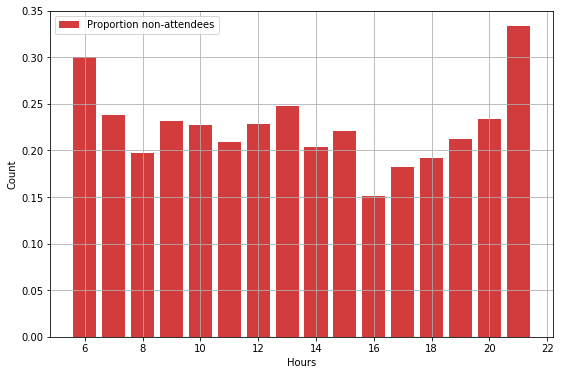

In [45]:
ma = medical_appointments[['Hour','No-show','AppointmentID']]
hours = ma.Hour.unique()
counts = ma.groupby(['Hour','No-show']).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
plt.figure(figsize=(9,6))
plt.bar(hours, counts['Yes']/(counts['No']+counts['Yes']), color='#d23c3c', label='Proportion non-attendees')
plt.grid(True)
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Count')


At the beginning and at the end of the work program, the proportion of non-attendees is the highest.

<a id='conclusions'></a>
## Conclusions

>In conclusion, from the analysis, the phenomenon of non-presence is frequently associated with people aged 0-9, 50-59, 70-79 and over 110 years, with appointments made on days 4, 5, 6, 9, 11, 13, 16, 17, 20 and 25 of the month, on weeks 19 and 20, on Thursday, Friday and Saturday, and at the beginning or the end of the appointment schedule.




In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0